Этот ноутбук содержит код для выполнения задачи 2:

2. Очистка и нормализация текста:
- привести к нижнему регистру;
- удалить ссылки, упоминания, эмодзи (по необходимости);
- заменить нестандартные символы;
- токенизировать текст.


In [1]:
import pandas as pd

data = pd.read_csv(
    r'data\raw_dataset.csv',
    encoding='latin-1',
    header=None,
    names=['target', 'id', 'date', 'flag', 'user', 'text']
)

data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


<Axes: >

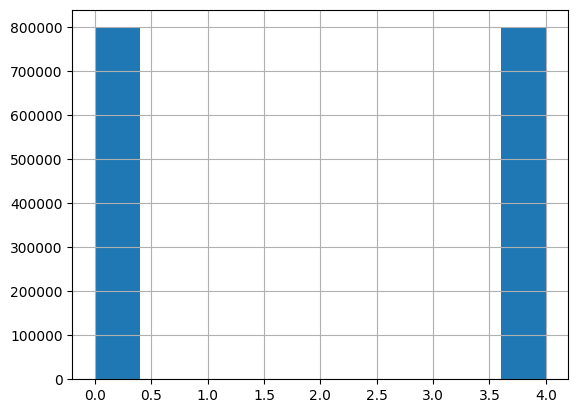

In [2]:
data['target'].hist()

В нижний регистр

In [8]:
text_lower = data['text'].str.lower()

text_lower

0          @switchfoot http://twitpic.com/2y1zl - awww, t...
1          is upset that he can't update his facebook by ...
2          @kenichan i dived many times for the ball. man...
3            my whole body feels itchy and like its on fire 
4          @nationwideclass no, it's not behaving at all....
                                 ...                        
1599995    just woke up. having no school is the best fee...
1599996    thewdb.com - very cool to hear old walt interv...
1599997    are you ready for your mojo makeover? ask me f...
1599998    happy 38th birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @thenspcc @sparkscharity...
Name: text, Length: 1600000, dtype: object

Удаление ссылок итд

In [11]:
import re

# ссылки и домены
URL_RE = re.compile(r'(https?://\S+|www\.\S+|[a-zA-Z0-9\-]+\.[a-zA-Z]{2,})')

# упоминания
MENTION_RE = re.compile(r'@\w+')

# хэштеги
HASHTAG_RE = re.compile(r'#\w+')

def clean(text: str) -> str:
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = URL_RE.sub(" ", text) # убрать ссылки и домены
    text = MENTION_RE.sub(" ", text) # убрать упоминания
    text = HASHTAG_RE.sub(" ", text) # убрать хэштеги
    text = re.sub(r"[^a-z0-9\s\.\,\!\?\']", " ", text) # оставить слова, цифры, .,!?'
    text = re.sub(r"\s+", " ", text).strip() # убрать лишние пробелы
    return text


clean_text_lower = text_lower.apply(clean)

clean_text_lower

0          awww, that's a bummer. you shoulda got david c...
1          is upset that he can't update his facebook by ...
2          i dived many times for the ball. managed to sa...
3             my whole body feels itchy and like its on fire
4          no, it's not behaving at all. i'm mad. why am ...
                                 ...                        
1599995    just woke up. having no school is the best fee...
1599996               very cool to hear old walt interviews!
1599997    are you ready for your mojo makeover? ask me f...
1599998    happy 38th birthday to my boo of alll time!!! ...
1599999                                                happy
Name: text, Length: 1600000, dtype: object

Токенизация